In [17]:
import pandas as pd
import numpy  as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [50]:
df=pd.read_csv(r'/home/shino/Documents/Datasets/student_habits_performance.csv')

In [51]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


In [52]:
x=df[['study_hours_per_day','attendance_percentage']]

In [21]:
x

,study_hours_per_day,attendance_percentage
0,0.0,85.0
1,6.9,97.3
2,1.4,94.8
3,1.0,71.0
4,5.0,90.9
...,...,...
995,2.6,77.0
996,2.9,86.0
997,3.0,61.9
998,5.4,100.0


In [22]:
y=df['exam_score']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=43,test_size=.2)

In [24]:
x_train

,study_hours_per_day,attendance_percentage
147,3.5,74.3
88,3.9,100.0
731,3.5,92.2
741,3.0,98.5
36,3.5,74.9
...,...,...
277,5.9,89.0
817,4.9,71.4
255,4.9,84.6
320,4.6,80.9


In [25]:
sc=StandardScaler()

In [26]:
sc.fit(x_train)
x_train_scaled=sc.transform(x_train)
x_test_scaled=sc.transform(x_test)

In [27]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [28]:
np.round(x_train_scaled.describe(),2)

,study_hours_per_day,attendance_percentage
count,800.00,800.00
mean,0.00,-0.00
std,1.00,1.00
min,-2.42,-3.00
25%,-0.71,-0.66
50%,-0.02,0.03
75%,0.66,0.71
max,3.26,1.72


In [29]:
np.round(x_train.describe(),2)

,study_hours_per_day,attendance_percentage
count,800.00,800.00
mean,3.53,83.95
std,1.46,9.32
min,0.00,56.00
25%,2.50,77.78
50%,3.50,84.20
75%,4.50,90.60
max,8.30,100.00


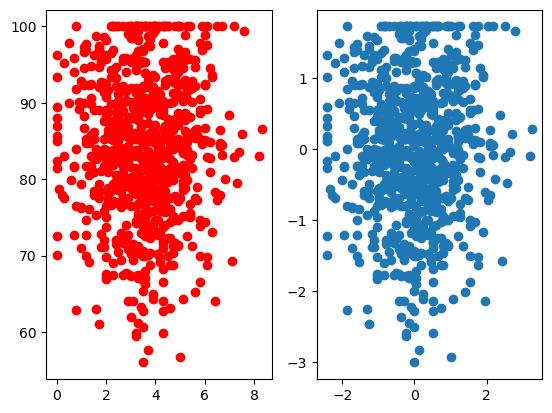

In [30]:
ax1=plt.subplot(1,2,1)
ax1.scatter(x_train['study_hours_per_day'],x_train['attendance_percentage'],color='r')

ax2=plt.subplot(1,2,2)
ax2.scatter(x_train_scaled['study_hours_per_day'],x_train_scaled['attendance_percentage'])

<Axes: ylabel='Density'>

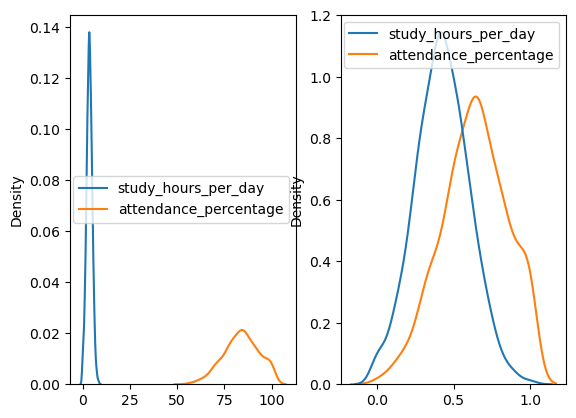

In [48]:
ax1=plt.subplot(1,2,1)
sns.kdeplot(x_train,ax=ax1)

ax2=plt.subplot(1,2,2)
sns.kdeplot(x_train_scaled,ax=ax2)

In [32]:
import seaborn as sns

## Min max scaling (normalization)

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
mx=MinMaxScaler()

In [35]:
mx.fit(x_train)
x_train_scaled=mx.transform(x_train)
x_test_scaled=mx.transform(x_test)

In [36]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [37]:
np.round(x_train.describe(),1)

,study_hours_per_day,attendance_percentage
count,800.0,800.0
mean,3.5,83.9
std,1.5,9.3
min,0.0,56.0
25%,2.5,77.8
50%,3.5,84.2
75%,4.5,90.6
max,8.3,100.0


In [38]:
np.round(x_train_scaled.describe(),1)

,study_hours_per_day,attendance_percentage
count,800.0,800.0
mean,0.4,0.6
std,0.2,0.2
min,0.0,0.0
25%,0.3,0.5
50%,0.4,0.6
75%,0.5,0.8
max,1.0,1.0


In [39]:
import seaborn as sns

<Axes: ylabel='Density'>

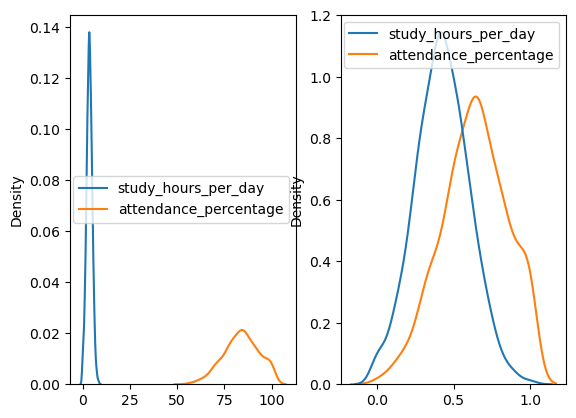

In [45]:
ax1=plt.subplot(121)
sns.kdeplot(x_train,ax=ax1)

ax2=plt.subplot(122)
sns.kdeplot(x_train_scaled,ax=ax2)

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

# Fit models
reg_model = LinearRegression()
reg_model.fit(x_train_scaled, y_train)

# Predict
y_pred = reg_model.predict(x_test_scaled)


In [47]:
print("Accuracy (raw):", accuracy_score(y_test, y_pred))

ValueError: continuous is not supported

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# STEP 1: Convert target to binary (classification)
df['target'] = (df['exam_score'] > 50).astype(int)

# STEP 2: Select features and target

y = df['target']

# STEP 3: Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=43, test_size=0.2)

# STEP 4: Scale the features
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# STEP 5: Train Logistic Regression model
model = LogisticRegression()
model_scaled=LogisticRegression()
model.fit(x_train, y_train)
model_scaled.fit(x_train_scaled, y_train)

# STEP 6: Predict
y_pred_scaled = model_scaled.predict(x_test_scaled)
y_pred=model.predict(x_test)

# STEP 7: Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Accuracy of scaled value :", accuracy_score(y_test, y_pred_scaled))


Accuracy: 0.91
Accuracy of scaled value : 0.88
